# Codigo para contar el numero de aparacieiones de una palabra en collection.txt , articulos 1,2 y 3 dentro de este.

amp [1, 0]
amp [2, 1]
amp [3, 2]
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
142 unique words identified in the text file, Article_2
The top 100 words are: 
('p', 'the', 'of', 'for', 'a', 'by', 'her', 'to', 'all', 'and', 'in', 'childhood', 'book', 'review', 'waiting', 'at', 'their', 'byline', 'length', 'headline', 'after', 'docno', 'type', 'docid', 'cousin', 'text', 'section', 'date', 'doc', 'these', 'be', 'children', 'edition', 'exhilarating', 'elena', 'lord', '20th', 'january', 'see', 'fatally', 'becomes', 'realized', 'beautifully', 'pages', 'table', 'themselves', 'wrote', 'are', 'one', 'expires', 'charge', 'mountaintop', 'mother', 'extraordinarily', 'jackies', '1', 'family', 'brunet', 'parents', 'point', 'australia', 'rev', 'so', 'human', 'characters', 'jess', 'fall', 'perennial', 'amp', 'william', 'from', 'household', 'lily', 'that', 'terribly', 'cope', 'father', 'favorite', 'life', 'breakfast', 'takes', 'library', 'owned', 'paperbacks', 'we', 'rival', 'an', '

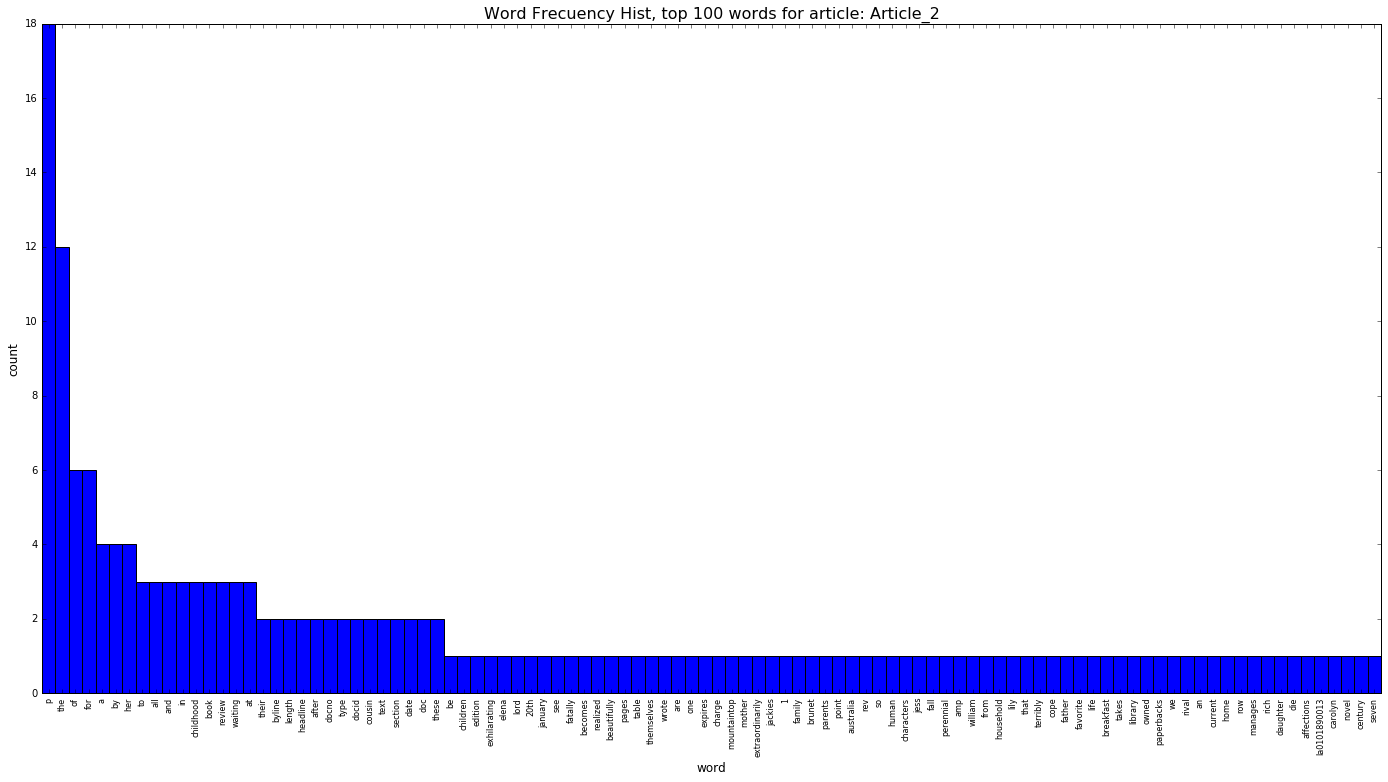

In [299]:
import os
import sys
import string
import argparse
import operator

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from collections import Counter


class Word_Counting:
    
    """
        Python script to create a histogram of words in a text file.
        Text file can contain punctuation, new lines, etc., but special characters aren't handled well.
        Input: filepath to the txt.
    """
    def __init__(self, filepath):

        # Path to text file to analyse
        rawfilepath = filepath
        # Load the file
        self.filepath = os.path.normpath(os.path.join(rawfilepath))
        # Aux variables
        self.hash_table = []
    def process_txt(self):
        
        file = open(self.filepath, 'r')
        # Parse as a list, removing lines
        content_sublists = [line.split(',') for line in file.readlines()]

        # Parse into a single list (from a list of lists)
        content_list = [item for sublist in content_sublists for item in sublist]
        # Remove whitespace so we can concatenate appropriately, and unify case
        content_list_strip = [str.strip().lower() for str in content_list]

        # Concatenate strings into a single string
        content_concat = ' '.join(content_list_strip)
        # Remove punctuation and new lines
        punct = set(string.punctuation)
        unpunct_content = ''.join(x for x in content_concat if x not in punct)

        # Split string into list of strings, again
        word_list = unpunct_content.split()
        
        # indices of the articles start:end
        indices = []
        for index, art in enumerate(word_list):
            if art == 'doc':
                indices.append(index+1)
        a = indices[0]
        b = indices[1]
        c = indices[3]
        d = indices[4]
        
        content_list_A = word_list[a:b]
        content_list_B = word_list[b:c]
        content_list_C = word_list[c:]
        
        return content_list_A, content_list_B, content_list_C, word_list
    
    
    def create_hash_table(self):
        
        """
            Clean and extract the integer representation of the word and viseversa
            :parameter  -> word  <string>
            :returns -> list of word counted in the articles a1, a2, a3
        """
        # Get articles
        A,B,C, word_list = self.process_txt()
       
        # Perform count
        counts_A = Counter(A)
        counts_B = Counter(B)
        counts_C = Counter(C)
        counts_all = Counter(word_list)


        words_A, count_values_A = zip(*counts_A.items())
        words_B, count_values_B = zip(*counts_B.items())
        words_C, count_values_C = zip(*counts_C.items())
        words, count_values = zip(*counts_all.items())
        # Sort both lists by frequency in values 
        
        values_A_sorted, words_A_sorted = zip(*sorted(zip(count_values_A, words_A),key=operator.itemgetter(0), reverse=True))
        values_B_sorted, words_B_sorted = zip(*sorted(zip(count_values_B, words_B),key=operator.itemgetter(0), reverse=True))
        values_C_sorted, words_C_sorted = zip(*sorted(zip(count_values_C, words_C),key=operator.itemgetter(0), reverse=True))
        values_sorted, words_sorted = zip(*sorted(zip(count_values, words), key=operator.itemgetter(0), reverse=True))

        
        
        values_for_A = [values_A_sorted, words_A_sorted]
        values_for_B = [values_B_sorted, words_B_sorted]
        values_for_C = [values_C_sorted, words_C_sorted]
        values_all = [values_sorted, words_sorted]
        
        hash_table_A = dict(zip(words_A_sorted, values_A_sorted))
        hash_table_B = dict(zip(words_B_sorted, values_B_sorted))
        hash_table_C = dict(zip(words_C_sorted, values_C_sorted))
    
        self.hash_table = [hash_table_A, hash_table_B, hash_table_C]    
                
        return self.hash_table, values_for_A, values_for_B, values_for_C, values_all
    
    def look_hash_table(self,word):
        
        # load hash table and nothing more
        hash_table,_,_,_,_ = self.create_hash_table()
        
        # look intothe hash table for giveng word
        for i, article in enumerate(hash_table):
            try:
                print(word, [i+1, article[word]])
            except:
                # if word not in table, return 0 to this article
                print(word, [i+1, 0])
            
        
    def plot(self, values_sorted, words_sorted, top_n, case):
        # Print a histogram containing the top N words, and print them and their counts.
        words_sorted_top = words_sorted[0:top_n]
        values_sorted_top = values_sorted[0:top_n]        
        print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
        print("{0} unique words identified in the text file, {1}".format(len(values_sorted), case))
        print("The top {0} words are: \n{1}".format(top_n, words_sorted_top))
        print("... their respective frequencies: \n{0}".format(values_sorted_top))
        print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
        # Pandas DataFrame just for visualisation
        df = pd.DataFrame({'count': values_sorted_top, 'word': words_sorted_top})
        print("{0}".format(df))
        sys.stdout.flush()

        # Histogram

        # Make xticklabels comprehensible by matplotlib
        xticklabels = str(list(words_sorted_top)).split()
        # Remove the single quotes, commas and enclosing square brackets
        xtlabs = [xstr.replace("'","").replace(",","").replace("]","").replace("[","") for xstr in xticklabels]

        indices = np.arange(len(words_sorted_top))
        width = 1
        
        pwidth = 24
        pheight = 12
        plt.figure(figsize=(pwidth, pheight))
        
        plt.title('Word Frecuency Hist, top {} words for article: {}'.format(top_n,case),fontsize=16)
        plt.xlabel('word', fontsize=12)
        plt.ylabel('count', fontsize=12)
        plt.bar(indices, values_sorted_top, width)
        plt.xticks(indices + width * 0.5, xtlabs, rotation='vertical', fontsize=8)
        
        plt.savefig("word_frecuency_from_article_{}.png".format(case)) 
        plt.show()


    def plot_case(self, top_n = 100, case = 'full'):
        
        # Unpack the variables
        _, values_for_A, values_for_B, values_for_C, values_all = self.create_hash_table()
        
        # Prepare variables to feed into plot
        values_A_sorted, words_A_sorted = values_for_A[0],values_for_A[1]
        values_B_sorted, words_B_sorted = values_for_B[0],values_for_B[1]
        values_C_sorted, words_C_sorted = values_for_C[0],values_for_C[1]
    
        values_sorted, words_sorted = values_all[0], values_all[1]

        if case == 'Article_1':      
            self.plot(values_A_sorted, words_A_sorted, top_n,case)
        if case == 'Article_2':      
            self.plot(values_B_sorted, words_B_sorted, top_n,case)
        if case == 'Article_3':      
            self.plot(values_C_sorted, words_C_sorted, top_n,case)
            
        # by default plot everything
        if case == 'collection.txt':
            self.plot(values_sorted, words_sorted, top_n,case)

        
filename = 'collection.txt'
# Create Object
word_counter = Word_Counting(filename)

#1.- look in hash table for 'amp'
word_counter.look_hash_table('amp')

#2.- Create Histrogram for top_n words
word_counter.plot_case(top_n = 100, case = 'Article_2')